<a href="https://colab.research.google.com/github/opsifiz/AIB5_Emotion-Classification/blob/main/baseline/baseline_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json

In [ ]:
!gdown https://drive.google.com/uc?id=1aH8KYfnN3l16dLpPpMJgJh3Q0OiaEufo

Downloading...
From: https://drive.google.com/uc?id=1aH8KYfnN3l16dLpPpMJgJh3Q0OiaEufo
To: /content/train_dataset.csv
100% 87.2M/87.2M [00:01<00:00, 68.0MB/s]


In [ ]:
df = pd.read_csv('train_dataset.csv',index_col=False)
#Create Temporay Dataset where each status have 100 texts.
temp = df
temp = temp.groupby('status').head(100)
temp = temp.drop(columns=['from'])
temp['predict'] = '-'
df = temp
df = df.reset_index(drop=True)
df

,text,status,translated,predict
0,oh my gosh,Anxiety,โอ้พระเจ้า!,-
1,trouble sleeping confused mind restless heart ...,Anxiety,นอนไม่หลับ วุ่นวายใจ กระวนกระวายใจ ทุกอย่างดูผ...,-
2,all wrong back off dear forward doubt stay in ...,Anxiety,ทุกอย่างไม่ถูกต้อง ถอยไปเถอะ อย่าก้าวไปข้างหน้...,-
3,i have shifted my focus to something else but ...,Anxiety,ฉันพยายามเบนความสนใจไปเรื่องอื่นแล้ว แต่ก็ยังก...,-
4,i am restless and restless it is been a month ...,Anxiety,ฉันกระวนกระวายใจมาก มันเป็นแบบนี้มาเป็นเดือนแล...,-
...,...,...,...,...
695,hey you all so a few years back i was supposed...,schizophrenia,-,-
696,my friend is too busy dealing with her own men...,schizophrenia,-,-
697,i feel like everything i have gone through in ...,schizophrenia,-,-
698,lately i have had this strange feeling like a ...,schizophrenia,-,-


#Baseline #4

In [ ]:
df['status'].value_counts().index

Index(['Anxiety', 'Normal', 'depression', 'bipolar', 'BPD', 'schizophrenia',
       'mentalillness'],
      dtype='object', name='status')

In [ ]:
from google import genai

client = genai.Client(api_key='GEMINI_API_KEY')

In [ ]:
def gemini_classify(txt):
  #BEGIN PROMPT
  prompt = "You are the best therapist, your work is to define this message that what kind of status is in this message:\n\nmessage : \""+txt+"\"\n"
  #END PROMPT
  # print(prompt)
  response = client.models.generate_content(
    model="gemini-2.0-flash-lite",
    contents=prompt,
    config={
        'response_mime_type': 'text/x.enum',
        'response_schema': {
            "type": "STRING",
            "enum":['Anxiety', 'Normal', 'depression', 'bipolar', 'BPD', 'schizophrenia', 'mentalillness'],
        },
    },
  )
  return response.text

In [ ]:
import time

for i in range(700):
  if(df.iloc[i]['predict'] != '-'):
    continue
  msg = gemini_classify(df.iloc[i]['text'])
  df.at[i, 'predict'] = msg
  print(i,msg)
  if (i+1)%100 == 0:
    df.to_csv('classify_data_'+str((i+1)//100)+'.csv')
  time.sleep(2)

df.to_csv('classify_data_done.csv')

2 Anxiety
3 Anxiety
4 Anxiety
5 Anxiety
6 Anxiety
7 Anxiety
8 Anxiety
9 Anxiety
10 Anxiety
11 Anxiety
12 depression
13 Anxiety
14 Anxiety
15 Anxiety
16 Anxiety
17 Anxiety
18 Normal
19 Anxiety
20 Anxiety
21 Anxiety
22 Anxiety
23 Anxiety
24 Anxiety
25 Anxiety
26 Anxiety
27 Anxiety
28 Anxiety
29 Anxiety
30 depression
31 Anxiety
32 Anxiety
33 Anxiety
34 Anxiety
35 BPD
36 Anxiety
37 Anxiety
38 Anxiety
39 Anxiety
40 Anxiety
41 Anxiety
42 Anxiety
43 Anxiety
44 Anxiety
45 Anxiety
46 Anxiety
47 Anxiety
48 Anxiety
49 Anxiety
50 Anxiety
51 Anxiety
52 Anxiety
53 Anxiety
54 Anxiety
55 Anxiety
56 Anxiety
57 Anxiety
58 Anxiety
59 Anxiety
60 Anxiety
61 Anxiety
62 BPD
63 bipolar
64 Anxiety
65 Anxiety
66 Anxiety
67 Anxiety
68 Anxiety
69 Anxiety
70 Anxiety
71 Anxiety
72 Anxiety
73 depression
74 Anxiety
75 Anxiety
76 Anxiety
77 Anxiety
78 Anxiety
79 Normal
80 Anxiety
81 Anxiety
82 Anxiety
83 Anxiety
84 depression
85 Anxiety
86 Anxiety
87 Anxiety
88 Anxiety
89 Normal
90 Anxiety
91 Anxiety
92 Anxiety
93 Anx

In [ ]:
df.describe()

,text,status,translated,predict
count,700,700,700,700
unique,700,7,300,7
top,it does not help that it is my trauma month in...,Anxiety,-,Anxiety
freq,1,100,400,167


In [ ]:
df['predict'].value_counts()

,count
predict,
Anxiety,167
depression,163
Normal,136
BPD,105
mentalillness,58
schizophrenia,38
bipolar,33


In [ ]:
all_status = df['status'].unique()
all_status

array(['Anxiety', 'Normal', 'depression', 'bipolar', 'BPD',
       'schizophrenia', 'mentalillness'], dtype=object)

In [ ]:
accuracy = ((df['predict']==df['status']).sum())/1000
print(accuracy)

0.407


<Figure size 800x600 with 0 Axes>

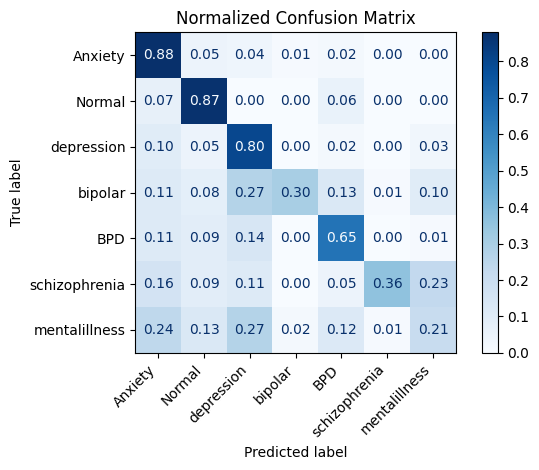

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

candidate_labels = ['Anxiety', 'Normal', 'depression', 'bipolar', 'BPD', 'schizophrenia', 'mentalillness']
# Compute normalized confusion matrix
cm = confusion_matrix(df['status'], df['predict'], labels=candidate_labels, normalize='true')

# Display normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=candidate_labels)

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format=".2f")
plt.xticks(rotation=45, ha='right')
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.show()